# SC2001 Lab 2

## Dijkstra Algorithm

(a) Suppose the input graph G = (V, E) is stored in an adjacency matrix and we use an array for the priority queue. Implement the Dijkstra’s algorithm using this setting and analyze its time complexity with respect to |V| and |E| both theoretically and empirically.

In [26]:
import heapq
import random
import numpy as np
from numpy import Inf
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import time
import math

# Dijkstra with Prioirty Queue

In [2]:
def dijkstra_matrix_array(adjMatrix, sourceNode):
    d = [] # array of estimates for lengths of shortest paths from source node
    pi = [] # array of predecessors for each vertex
    S =  [] # set of vertices whose shortest path from source already determined
    priorityQueue = [] # Priority Queue Q

    infinity = 9999999 # alternatively infinity = (float('inf'))
    graphLength = len(adjMatrix)

    for i in range(graphLength): # for each vertex v
        d.append(infinity) # set distance to infinity, d[v] = infinity
        # pi.append(None) # set predecessor to NULL, pi[v] = null
        pi.append(-1) # set predecessor to NULL, pi[v] = null
        S.append(0) # set solution set S to empty at first, where all v not in S

        # put all vertices in Priority Queue Q in d[v]'s increasing order
        priorityQueue.append(i)

    d[sourceNode] = 0 # set estimated distance to itself (src to src) to be 0

    while len(priorityQueue) != 0: # if Q not empty
        # Implementation of u = ExtractCheapest(Q)
        cheapest = 0
        for i in range(len(priorityQueue)):
            if (d[priorityQueue[i]] < d[priorityQueue[cheapest]]):
                cheapest = i;
        u = priorityQueue.pop(cheapest)

        S[u] = 1 # add u to S

        for i in range(graphLength): # for each vertex v adjacent to u
            vertex = i;
            weight = adjMatrix[u][i]

            if (weight > 0):
                # if vertex v not in solution set & estimated distance distance
                # of vertex v bigger than src node + weighted edge[u, v]
                if ((S[vertex] != 1) and (d[vertex] > (d[u] + weight))):
                    d[vertex] = d[u] + weight # update the new shortest value
                    pi[vertex] = u # set predecessor of vertex v as u

    return d, pi

In [3]:
def graph_generator(n, e):
    matrix = [[0 for i in range(n)] for j in range(n)]
    while (e != 0):
        a = random.randint(0, n-1)
        b = random.randint(0, n-1)
        
        if a != b and matrix[a][b] == 0:
            matrix[a][b] = 1
            e -= 1
        
    #Generating the weight
    for i in range(n):
        for j in range(n):
            if (matrix[i][j] == 1):
                matrix[i][j] = random.randint(1, 100)
                    
    return matrix

In [42]:
def measure_runtime(n, e):
    graph = graph_generator(n, e)
    start_time = time.time()
    dijkstra_matrix_array(graph, 0)
    end_time = time.time()
    return end_time - start_time

In [4]:
# Complete Graph
n = 10
e = n*(n-1)  
incom_adjMatrixTest = graph_generator(n, e)
for i in incom_adjMatrixTest:
    print(i)

[0, 76, 79, 28, 14, 86, 58, 90, 71, 23]
[74, 0, 6, 35, 65, 87, 97, 75, 52, 40]
[75, 80, 0, 5, 85, 74, 83, 44, 70, 44]
[95, 28, 12, 0, 67, 99, 32, 13, 100, 39]
[3, 9, 11, 4, 0, 39, 72, 79, 45, 80]
[88, 81, 56, 79, 100, 0, 3, 51, 59, 12]
[28, 11, 45, 83, 43, 46, 0, 50, 46, 90]
[13, 4, 17, 18, 58, 46, 91, 0, 96, 17]
[13, 8, 35, 73, 21, 5, 80, 44, 0, 72]
[79, 64, 77, 11, 65, 97, 56, 87, 47, 0]


# Graph for runtime using AdjMatrix and PQ

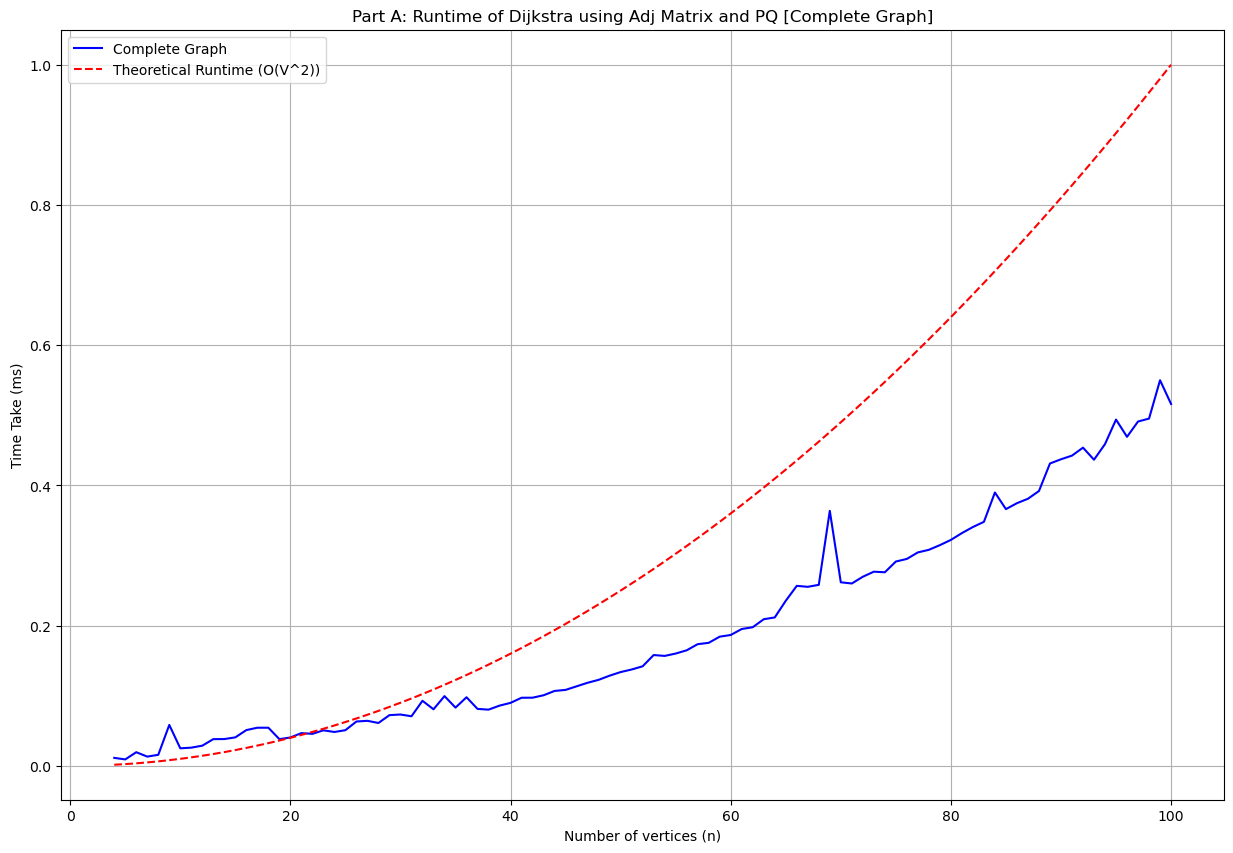

In [16]:
# Complete Graph: E = n*(n-1)
complete_a = {"x": [], "y": []}

for n in range(4, 101):
    complete_a["x"].append(n)
    e = n*(n-1)
    adj_Mtr = graph_generator(n, e)
    
    #print(adj_Mtr)
    
    #start measuring time
    startTime = time.perf_counter()
    
    dijkstra_matrix_array(adj_Mtr, 0)
            
    #stop measuring time   
    stopTime = time.perf_counter()
    
    runtime = (stopTime - startTime) * 1000
    complete_a["y"].append(runtime)
    
# Generate theoretical runtime O(V^2)
scaling_factor = 0.0001  # Adjust this to match the scale of actual runtime
theoretical_runtime = [n**2 * scaling_factor for n in complete_a["x"]]

fig = plt.figure()
fig.set_size_inches(15,10)
plt.plot(complete_a["x"], complete_a["y"], label = "Complete Graph", color = "blue")

plt.plot(complete_a["x"], theoretical_runtime, label="Theoretical Runtime (O(V^2))", color="red", linestyle="--")

plt.xlabel("Number of vertices (n)")
plt.ylabel("Time Take (ms)")

plt.title("Part A: Runtime of Dijkstra using Adj Matrix and PQ [Complete Graph]")
plt.grid()
plt.legend()
plt.show()

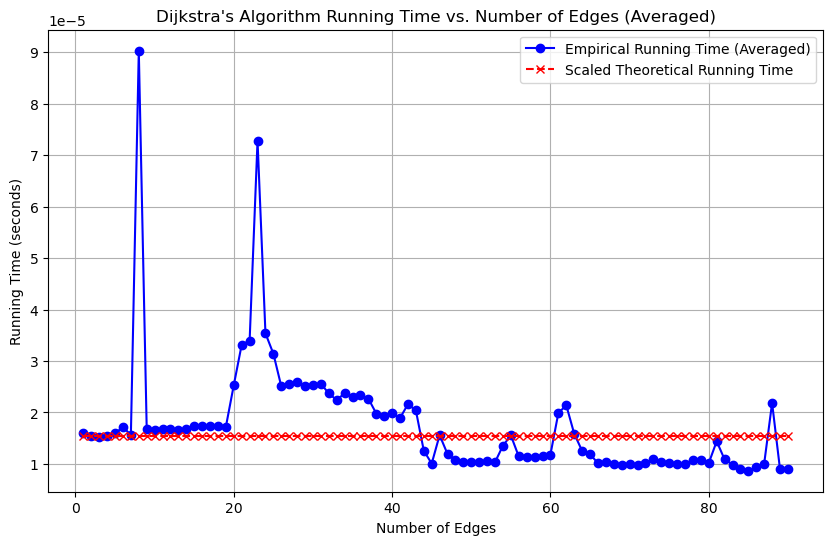

In [46]:
V = 10  # Fixed number of nodes
max_edges = V * (V - 1)  # Maximum possible edges in a directed graph (no self-loops)
    
edges_range = list(range(1, max_edges + 1))  # Edge counts from 1 to max_edges
empirical_times = []
theoretical_times = []

for E in edges_range:
    # Measure empirical runtime (averaged over multiple runs for stability)
    total_time = sum(measure_runtime(V, E) for _ in range(5)) / 5
    empirical_times.append(total_time)

    # Calculate theoretical runtime based on O(V^2)
    theoretical_times.append((V ** 2) * (10 ** -6) * 0.3)  # Scaled for comparison with actual runtime
    
# Calculate the scaling factor based on the second data point
scaling_factor = empirical_times[1] / theoretical_times[1] if len(theoretical_times) > 1 else 1

# Scale the theoretical times
scaled_theoretical_times = [t * scaling_factor for t in theoretical_times]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(edges_range, empirical_times, 'bo-', label='Empirical Running Time (Averaged)')
plt.plot(edges_range, scaled_theoretical_times, 'r--x', label='Scaled Theoretical Running Time')

plt.title("Dijkstra's Algorithm Running Time vs. Number of Edges (Averaged)")
plt.xlabel("Number of Edges")
plt.ylabel("Running Time (seconds)")
plt.legend()
plt.grid()

plt.show()

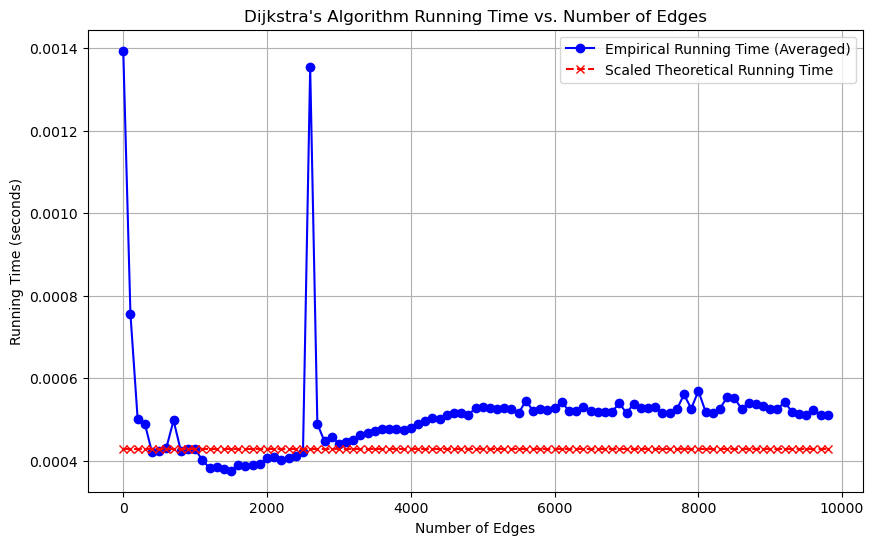

In [49]:
V = 100  # Fixed number of vertices
max_edges = V * (V - 1)  # Maximum possible edges in a directed graph without self-loops
    
edges_range = list(range(1, max_edges + 1, 100))  # Edge counts from 1 to max_edges in steps of 100
empirical_times = []
theoretical_times = []

for E in edges_range:
    # Measure empirical runtime (averaged over multiple runs for stability)
    total_time = sum(measure_runtime(V, E) for _ in range(5)) / 5  # Average over multiple runs
    empirical_times.append(total_time)


# Calculate theoretical running times based on O(V^2)
theoretical_times = [(V ** 2) * (10 ** -6) * 0.3 for _ in edges_range]  # Unscaled theoretical values

# Calculate the scaling factor based on the second data point
scaling_factor = empirical_times[10] / theoretical_times[10] if len(theoretical_times) > 1 else 1

# Scale the theoretical times
scaled_theoretical_times = [t * scaling_factor for t in theoretical_times]

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot empirical running time
plt.plot(edges_range, empirical_times, 'bo-', label='Empirical Running Time (Averaged)')

# Plot scaled theoretical running time
plt.plot(edges_range, scaled_theoretical_times, 'r--x', label='Scaled Theoretical Running Time')

plt.title("Dijkstra's Algorithm Running Time vs. Number of Edges")
plt.xlabel("Number of Edges")
plt.ylabel("Running Time (seconds)")
plt.legend()
plt.grid()

plt.show()

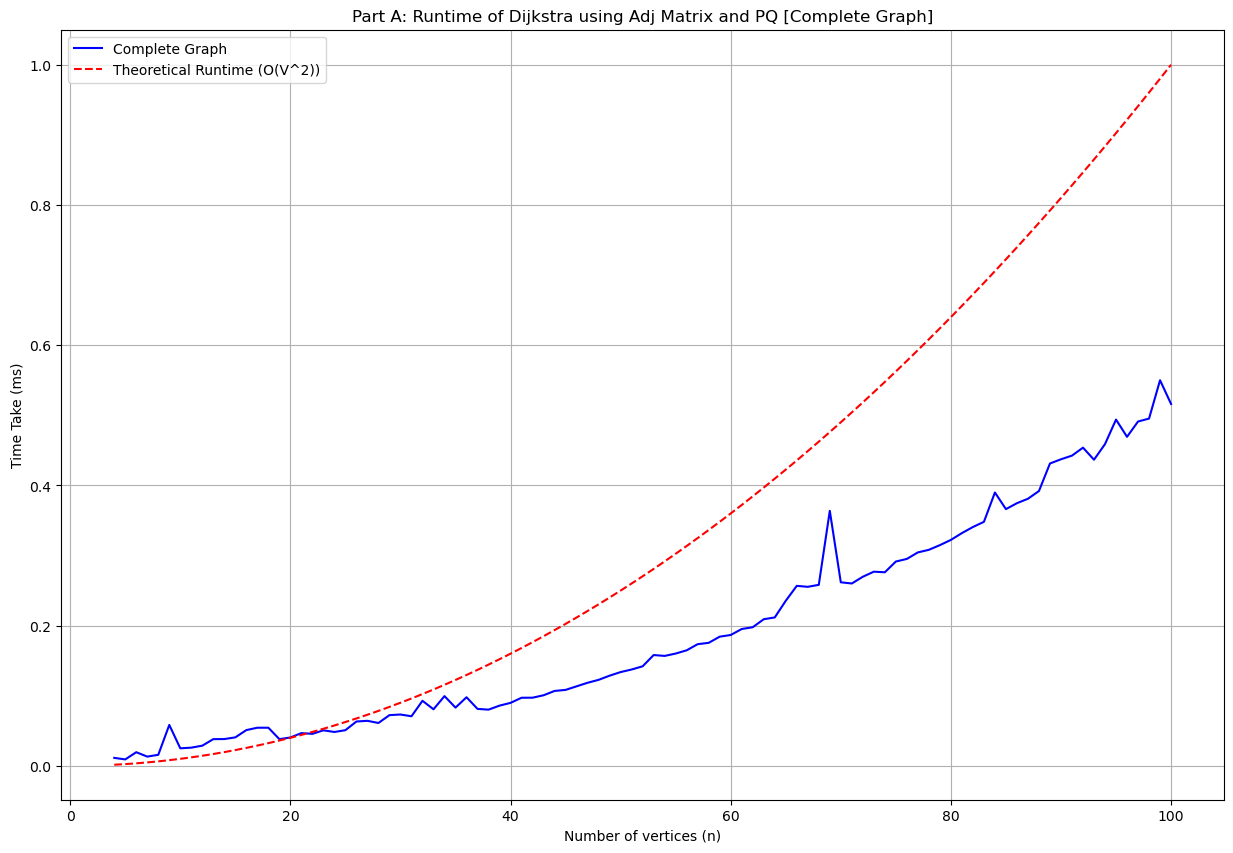

In [18]:
complete_a_expon = {"x": [], "y": []}

theoretical_times = []

for exponent in range(2, 11):
    n = 2**exponent
    e = n*(n - 1)
    complete_a_expon["x"].append(n)
    adj_Mtr = graph_generator(n, e)
    
    #print(adj_Mtr)
    
    #start measuring time
    startTime = time.perf_counter()
    
    dijkstra_matrix_array(adj_Mtr, 0)
            
    #stop measuring time   
    stopTime = time.perf_counter()
    
    runtime = (stopTime - startTime) * 1000
    complete_a_expon["y"].append(runtime)
    
# Generate theoretical runtime O(V^2)
scaling_factor = 0.0001  # Adjust this to match the scale of actual runtime
theoretical_runtime = [n**2 * scaling_factor for n in complete_a["x"]]


fig = plt.figure()
fig.set_size_inches(15,10)
plt.plot(complete_a["x"], complete_a["y"], label = "Complete Graph", color = "blue")

plt.plot(complete_a["x"], theoretical_runtime, label="Theoretical Runtime (O(V^2))", color="red", linestyle="--")

plt.xlabel("Number of vertices (n)")
plt.ylabel("Time Take (ms)")

plt.title("Part A: Runtime of Dijkstra using Adj Matrix and PQ [Complete Graph]")
plt.grid()
plt.legend()
plt.show()

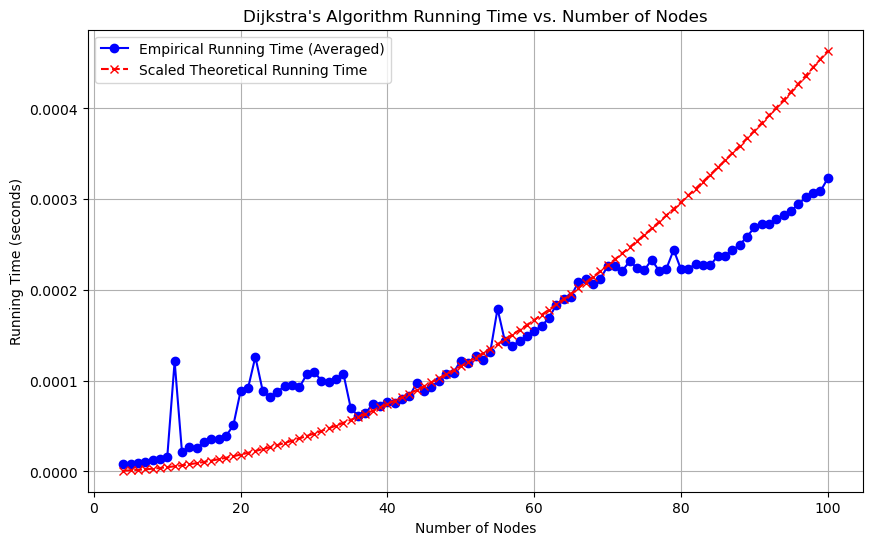

In [55]:
edge_count = 10  # Fixed number of edges
node_range = list(range(4, 101))  # Nodes from 4 to 100
    
empirical_times = []
theoretical_times = []

for V in node_range:
    # Measure empirical runtime (averaged over multiple runs for stability)
    total_time = sum(measure_runtime(V, edge_count) for _ in range(5)) / 5  # Average over multiple runs
    empirical_times.append(total_time)

    # Calculate theoretical runtime based on O(V^2)
    theoretical_times.append((V ** 2) * (10 ** -6))  # Scaled for comparison with actual runtime

# Calculate the scaling factor based on the second data point
scaling_factor = empirical_times[60] / theoretical_times[60] if len(theoretical_times) > 1 else 1

# Scale the theoretical times
scaled_theoretical_times = [t * scaling_factor for t in theoretical_times]

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot empirical running time
plt.plot(node_range, empirical_times, 'bo-', label='Empirical Running Time (Averaged)')

# Plot scaled theoretical running time
plt.plot(node_range, scaled_theoretical_times, 'r--x', label='Scaled Theoretical Running Time')

plt.title("Dijkstra's Algorithm Running Time vs. Number of Nodes")
plt.xlabel("Number of Nodes")
plt.ylabel("Running Time (seconds)")
plt.legend()
plt.grid()

plt.show()

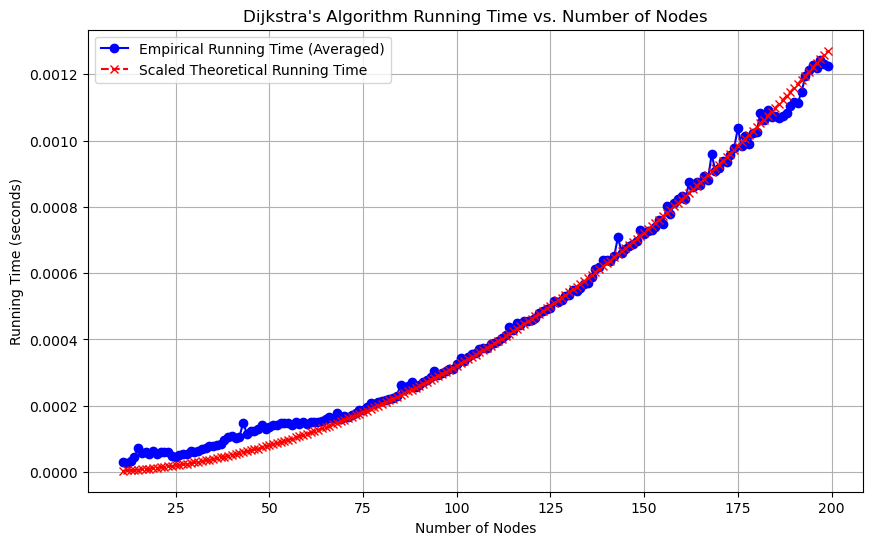

In [56]:
edge_count = 100  # Fixed number of edges
node_range = list(range(11, 200)) 
    
empirical_times = []
theoretical_times = []

for V in node_range:
    # Measure empirical runtime (averaged over multiple runs for stability)
    total_time = sum(measure_runtime(V, edge_count) for _ in range(5)) / 5  # Average over multiple runs
    empirical_times.append(total_time)

    # Calculate theoretical runtime based on O(V^2)
    theoretical_times.append((V ** 2) * (10 ** -6))  # Scaled for comparison with actual runtime

# Calculate the scaling factor based on the second data point
scaling_factor = empirical_times[100] / theoretical_times[100] if len(theoretical_times) > 1 else 1

# Scale the theoretical times
scaled_theoretical_times = [t * scaling_factor for t in theoretical_times]

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot empirical running time
plt.plot(node_range, empirical_times, 'bo-', label='Empirical Running Time (Averaged)')

# Plot scaled theoretical running time
plt.plot(node_range, scaled_theoretical_times, 'r--x', label='Scaled Theoretical Running Time')

plt.title("Dijkstra's Algorithm Running Time vs. Number of Nodes")
plt.xlabel("Number of Nodes")
plt.ylabel("Running Time (seconds)")
plt.legend()
plt.grid()

plt.show()

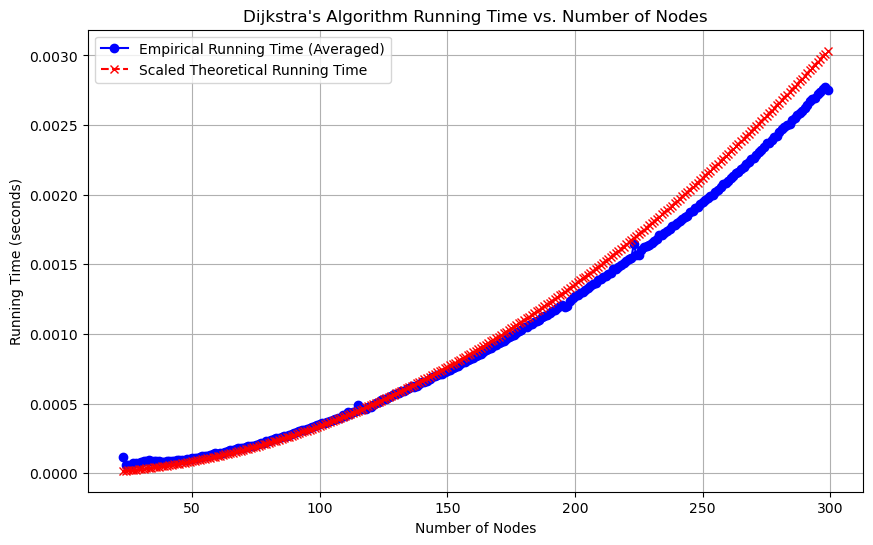

In [58]:
edge_count = 500  # Fixed number of edges
node_range = list(range(23, 300)) 
    
empirical_times = []
theoretical_times = []

for V in node_range:
    # Measure empirical runtime (averaged over multiple runs for stability)
    total_time = sum(measure_runtime(V, edge_count) for _ in range(5)) / 5  # Average over multiple runs
    empirical_times.append(total_time)

    # Calculate theoretical runtime based on O(V^2)
    theoretical_times.append((V ** 2) * (10 ** -6))  # Scaled for comparison with actual runtime

# Calculate the scaling factor based on the second data point
scaling_factor = empirical_times[100] / theoretical_times[100] if len(theoretical_times) > 1 else 1

# Scale the theoretical times
scaled_theoretical_times = [t * scaling_factor for t in theoretical_times]

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot empirical running time
plt.plot(node_range, empirical_times, 'bo-', label='Empirical Running Time (Averaged)')

# Plot scaled theoretical running time
plt.plot(node_range, scaled_theoretical_times, 'r--x', label='Scaled Theoretical Running Time')

plt.title("Dijkstra's Algorithm Running Time vs. Number of Nodes")
plt.xlabel("Number of Nodes")
plt.ylabel("Running Time (seconds)")
plt.legend()
plt.grid()

plt.show()

# Theoretical Analysis
We expect the Dijkstra's Shortest Path Search algorithm to have a time complexity of *O(|V|2)*.

## Derivations:

- Since we are working with directed and connected graph, we guarantee to visit all nodes.  This incurs a search cost of *O(|V|)*.
- On each iteration, we expand the vertex with smallest distance from start vertex. We find this vertex by traversing through the dist[] array and find the minimum. This incurs a search cost of *O(|V|)*.
- On each iteration, we check if the other vertices are connected to it. 

This incurs a search cost of *O(|V| - 1)*.
Thus, DIjkstra's Shortest Path Search algorithm on adjacency matrix with array-based Priority Queue has a time complexity of *O(|V|)* x (*O(|V|)* + *O(|V| - 1)) = O(|V|2)*.

#   

b) Suppose the input graph G = (V, E) is stored in an array of adjacency lists and
we use a minimizing heap for the priority queue. Implement the Dikstra's algorithm using this setting and analyze its time complexity with respect to V and E both theoretically and empirically.

In [59]:
#convert adj_Matrix to adj_List

def convert_to_adjacency_list(graph, n):
    adjacency_list = defaultdict(list)
    for i in range(n):
        for j in range(n):
            if graph[i][j] != 0:
                adjacency_list[i].append((j, graph[i][j]))
    return adjacency_list

In [60]:
#Printing out adj_List¶

def print_adjList(adjList):
    for i in adjList:
        print(i, end="")
        for j in adjList[i]:
            print(" -> {}".format(j), end="")
        print()

# Dijkstra with Heap algorithm

In [61]:
def dijkstra_adj_list(graph, root):
    n = len(graph)
    # set up "inf" distances
    dist = [Inf for _ in range(n)]
    # set up root distance
    dist[root] = 0
    # set up visited node list
    visited = [False for _ in range(n)]
    # set up priority queue
    pq = [(0, root)]
    # while there are nodes to process
    while len(pq) > 0:
        # get the root, discard current distance
        _, u = heapq.heappop(pq)
        # if the node is visited, skip
        if visited[u]:
            continue
        # set the node to visited
        visited[u] = True
        # check the distance and node and distance
        for v, l in graph[u]:
            # if the current node's distance + distance to the node we're visiting
            # is less than the distance of the node we're visiting on file
            # replace that distance and push the node we're visiting into the priority queue
            if dist[u] + l < dist[v]:
                dist[v] = dist[u] + l
                heapq.heappush(pq, (dist[v], v))
    return dist

In [65]:
def measure_runtime2(n, e):
    graph = graph_generator(n, e)
    start_time = time.time()
    dijkstra_adj_list(graph, 0)
    end_time = time.time()
    return end_time - start_time

# Graph of Runtime vs Dijkstra using Adj list and heap 

In [64]:
def calculate_theoretical_runtime_complete_graph(vertices):
    theoretical_runtime = []
    for n in vertices:
        e = n * (n - 1)  # Number of edges in a complete graph
        runtime = e * math.log2(n) * scaling_factor  # O((V + E) log(V)) with scaling
        theoretical_runtime.append(runtime)
    return theoretical_runtime


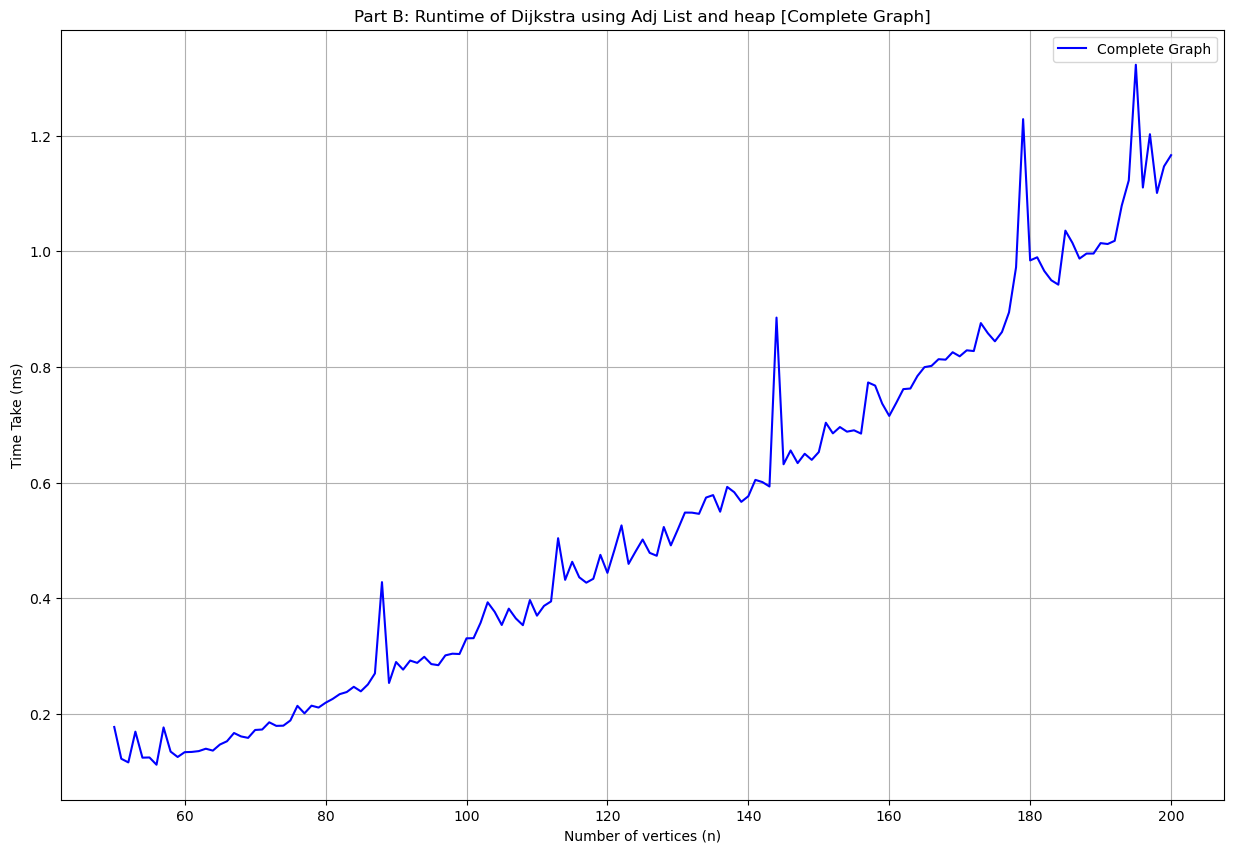

In [84]:
complete_b = {"x": [], "y": []}

for n in range(50, 201):
    complete_b["x"].append(n)
    e = n*(n - 1)
    adj_Mtr = graph_generator(n, e)
    com_list = convert_to_adjacency_list(adj_Mtr, n)
    
    #print(adj_Mtr)
    
    #start measuring time
    startTime = time.perf_counter()
    
    dijkstra_adj_list(com_list, 0)
            
    #stop measuring time   
    stopTime = time.perf_counter()
    
    runtime = (stopTime - startTime) * 1000
    complete_b["y"].append(runtime)


fig = plt.figure()
fig.set_size_inches(15,10)
plt.plot(complete_b["x"], complete_b["y"], label = "Complete Graph", color = "blue")


plt.xlabel("Number of vertices (n)")
plt.ylabel("Time Take (ms)")

plt.title("Part B: Runtime of Dijkstra using Adj List and heap [Complete Graph]")
plt.grid()
plt.legend()
plt.show()

# Theoretical Analysis
We expect Dijkstra's Shortest Path Search algorithm using adjacency list and min heap priority queue to have a time complexity of *O(|E| log |V|)*.

## Derivations:

- Since we are working with connected and directed graph, we are guaranteed to be able to traverse to all vertices regardless of where we begin. This incurs a search cost of *O(|V|)* to visit all vertices.

- On each visit, we only visit those vertices which are connected to the current vertex. By our defined parameters, we know that each vertex has exactly |E|/|V| edges. When we push each connected vertex to the priority queue, we are doing recursive swaps within the min heap until the vertex reaches the correct position. This incurs a cost of *O(log |V|)*.

- When we dequeue from the priority queue, we call heapify to transform the heap without root into a new heap. This incurs another cost of *O(log |V|)*.

Thus, the total time complexity of Dijkstra's algorithm using adjacency list and min heap as priority queue is: 
 

### Proof that pushing vertex into priority queue incurs a time complexity of *O(log |V|)*

We consider a densely connected graph such that each vertex, v has exactly |V| - 1 edges. We call such graphs strongly connected.

On each iteration, we will push |V| - 2 vertices (since we exclude vertex connect to itself) into the priority queue and extract 1 vertex from the queue.


Since the maximum number of vertices in a priority queue is at most *O(|V|2), the time complexity of pushing a vertex into a priority queue is therefore O(log |V|2)* = *O(2 log |V|)* = *O(log |V|)*.
 

#  

(c) Compare the two implementations in (a) and (b). Discuss which implementation is better and in what circumstances.

# Our hypothesis:

- It is much less efficient to use adjacency matrix for sparsely connected graph as there are a lot of unused space (marked as -1) but still incurs the same search cost of *O(|V| - 1)* for every vertex, v.
- It is much more efficient to use adjacency list for sparsely connected graph as the adjacency list only shows the connected vertices. So it is more space and time efficient.
- As the graph becomes more and more populated, the efficiency of using adjacency matrix increases while the efficiency of using adjacency list drops.
- Accessing an array (the 2D array which makes up the matrix) is much faster than accessing a linked list data structure (the linked list which makes up the list). So when the graph is densely populated, the number of traversal taken between when using matrix form or list form is the same, which makes the difference in accessing time between data structures the key difference in determining which adjacency form is faster.
- The array-based Priority Queue in adjacency matrix scales with |V| while the min heap-based Priority Queue in adjacency list scales with |E|. When graph is sparsely connected, i.e. |V| roughly equals to |E|, the min heap Priority Queue of *O(log |V|)* will definitely outperform the array-based Priority Queue of *O(|V|). However, when graph is strongly connected, i.e. |E|* is roughly |V|2, the array-based Priority Queue which scales with |V| will still have the same complexity, but the min heap-based Priority Queue which scales with |E| (or now |V|2) will be much worse than array-based Priority Queue.

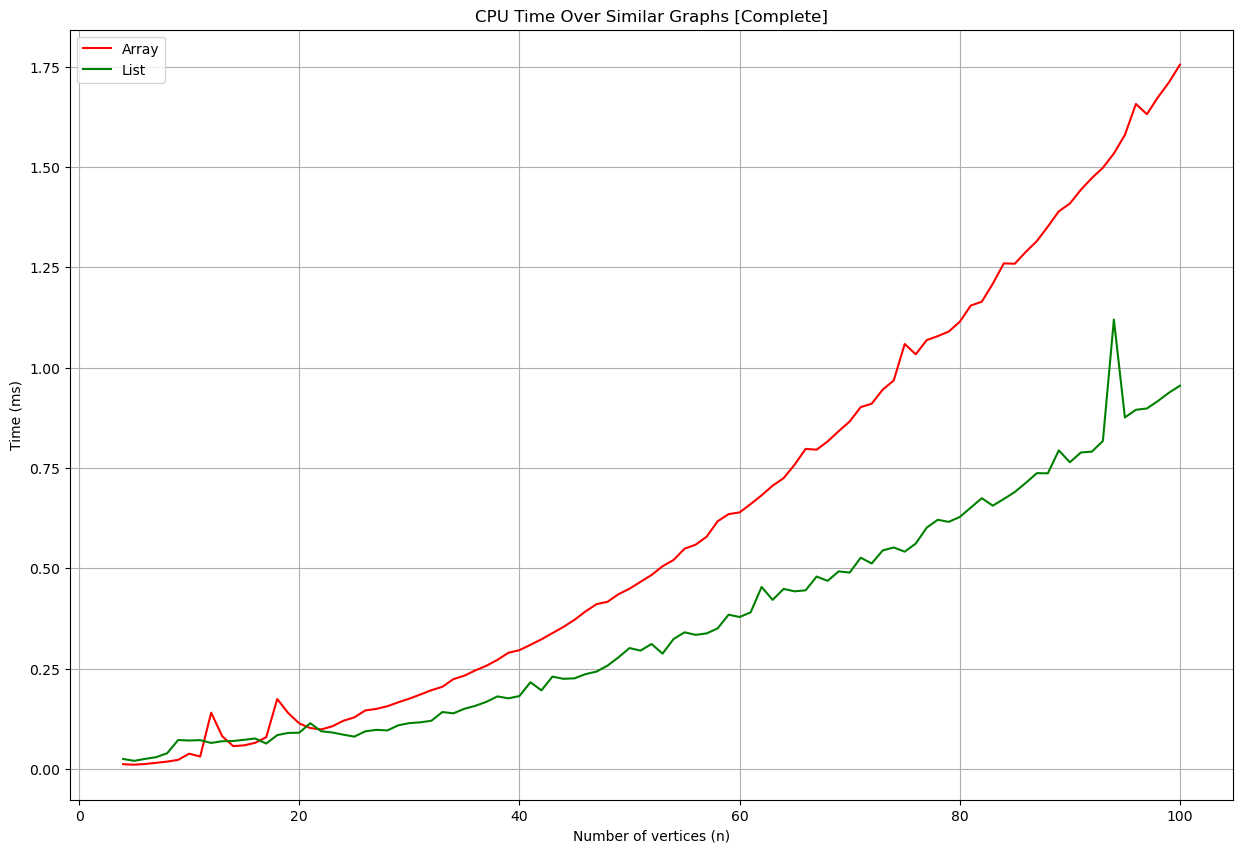

In [14]:
fig = plt.figure()
fig.set_size_inches(15, 10)

plt.plot(complete_a["x"], complete_a["y"], label = "Array", color = "red")
plt.plot(complete_b["x"], complete_b["y"], label = "List", color = "green")


plt.xlabel("Number of vertices (n)")
plt.ylabel("Time (ms)")

plt.title("CPU Time Over Similar Graphs [Complete]")

plt.grid()
plt.legend()
plt.show()